In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import pygeos
import rtree
from time import sleep


/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
gp.read_file('../raw_data/housing_data.shp')

,schluessel,prognosera,angebotsmi,aenderung_,anteil_lei,anteil_soz,anteil_sta,entwicklun,wohndauer,wohnungsum,wohnungs_1,wohnungsve,wohnungs_2,geometry
0,0101,Zentrum,16.17,-1.26,8.13,1.84,16.66,11.30,56.71,15.39,78.40,7.71,48.92,"POLYGON ((389165.070 5821874.114, 389207.883 5..."
1,0102,Moabit,14.53,-4.96,16.13,6.69,4.41,6.07,59.13,11.91,87.17,8.43,52.36,"POLYGON ((389165.070 5821874.114, 389321.893 5..."
2,0103,Gesundbrunnen,10.24,-5.19,30.60,23.13,19.77,2.86,63.97,6.37,43.92,3.28,25.25,"POLYGON ((391337.962 5824343.426, 391339.511 5..."
3,0104,Wedding,9.60,-5.22,23.97,5.88,15.24,1.08,61.66,10.38,68.97,5.29,43.52,"POLYGON ((388630.774 5822231.745, 388432.087 5..."
4,0201,Kreuzberg-Nord,13.35,-7.40,31.19,26.09,28.67,0.90,68.51,4.99,61.13,1.39,18.20,"POLYGON ((392753.849 5817395.996, 392725.022 5..."
5,0202,Kreuzberg Süd,14.41,-3.34,12.55,5.63,4.90,2.41,63.39,25.45,132.08,6.33,48.02,"POLYGON ((389421.839 5816224.763, 389427.653 5..."
6,0203,Kreuzberg Ost,12.69,-5.01,19.38,7.39,9.34,-2.31,68.17,16.02,90.74,6.25,42.41,"POLYGON ((395006.150 5817501.279, 394963.738 5..."
7,0204,Friedrichshain West,14.63,-1.07,11.32,1.12,37.51,6.09,59.70,6.89,121.06,8.19,56.39,"POLYGON ((394744.023 5818387.912, 394592.722 5..."
8,0205,Friedrichshain Ost,13.97,-2.04,10.25,0.74,8.37,9.84,52.41,30.54,152.37,11.17,84.35,"POLYGON ((396123.600 5818000.238, 396092.188 5..."
9,0301,Buch,8.65,-2.53,15.06,0.00,44.80,6.99,63.49,0.00,2.55,0.92,7.40,"POLYGON ((399855.740 5832724.078, 399851.417 5..."


# Loading migration data

In [65]:
mig_data = pd.read_csv('../raw_data/EWRMIGRA202012E_Matrix.csv', sep=';')
gen_data = pd.read_csv('../raw_data/EWR202012E_Matrix.csv', sep=';')

migration = mig_data[['ZEIT','RAUMID', 'MH_E', 'MH_EM', 'MH_EW']].merge(gen_data[['RAUMID', 'E_E' ,'E_EM', 'E_EW', 'E_E00_01',
       'E_E01_02', 'E_E02_03', 'E_E03_05', 'E_E05_06', 'E_E06_07', 'E_E07_08',
       'E_E08_10', 'E_E10_12', 'E_E12_14', 'E_E14_15', 'E_E15_18', 'E_E18_21',
       'E_E21_25', 'E_E25_27', 'E_E27_30', 'E_E30_35', 'E_E35_40', 'E_E40_45',
       'E_E45_50', 'E_E50_55', 'E_E55_60', 'E_E60_63', 'E_E63_65', 'E_E65_67',
       'E_E67_70', 'E_E70_75', 'E_E75_80', 'E_E80_85', 'E_E85_90', 'E_E90_95',
       'E_E95_110']], on='RAUMID')

migration.to_csv('../data/migration_data.csv')

# Loading school data

In [3]:
schools_list = pd.read_excel('../raw_data/Schulen.xlsx')

schools_list = schools_list.drop(index=0)
new_header = schools_list.iloc[0] #grab the first row for the header
schools_list = schools_list[1:] #take the data less the header row
schools_list.columns = new_header #set the header row as the df header

schools_list = schools_list[schools_list.Traeger!='privat']
schools_list = schools_list[['BSN', 'NAME', 'Bezirk', 'PLZ', 'Adresse']]

schools_list

1,BSN,NAME,Bezirk,PLZ,Adresse
2,01G01,Grundschule am Arkonaplatz,Mitte,10115,Ruppiner Str. 47-48
3,01G02,Papageno-Grundschule,Mitte,10115,Bergstr. 58
4,01G04,Kastanienbaum-Grundschule,Mitte,10119,Gipsstr. 23 A
5,01G05,Grundschule Neues Tor,Mitte,10115,Hannoversche Str. 20
6,01G07,GutsMuths-Grundschule,Mitte,10179,Singerstr. 8
...,...,...,...,...,...
439,12G29,Hermann-Schulz-Grundschule,Reinickendorf,13403,Kienhorststr. 67-79
440,12G30,Reineke-Fuchs-Grundschule,Reinickendorf,13403,Foxweg 15
441,12G32,Charlie-Chaplin-Grundschule,Reinickendorf,13439,Wilhelmsruher Damm 90-94
442,12G33,Lauterbach-Grundschule,Reinickendorf,13435,Senftenberger Ring 41


In [4]:
schools_stat = pd.read_excel('../raw_data/schools_stat.xlsx')

new_header = schools_stat.iloc[0] #grab the first row for the header
schools_stat = schools_stat[1:] #take the data less the header row
schools_stat.columns = new_header #set the header row as the df header

schools_stat.columns = ['School_year', 'BSN', 'NAME', 'children', 'children_f',
       'children_m', 'teachers', 'teachers_f', 'teachers_m']

schools_stat = schools_stat.drop(columns='NAME')

In [5]:
schools = schools_list.merge(schools_stat, how='left', on='BSN')
schools

,BSN,NAME,Bezirk,PLZ,Adresse,School_year,children,children_f,children_m,teachers,teachers_f,teachers_m
0,01G01,Grundschule am Arkonaplatz,Mitte,10115,Ruppiner Str. 47-48,2021/22,427,203,224,32,28,4
1,01G02,Papageno-Grundschule,Mitte,10115,Bergstr. 58,2021/22,592,318,274,45,32,13
2,01G04,Kastanienbaum-Grundschule,Mitte,10119,Gipsstr. 23 A,2021/22,400,181,219,29,24,5
3,01G05,Grundschule Neues Tor,Mitte,10115,Hannoversche Str. 20,2021/22,401,188,213,38,29,9
4,01G07,GutsMuths-Grundschule,Mitte,10179,Singerstr. 8,2021/22,361,168,193,29,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...
374,12G29,Hermann-Schulz-Grundschule,Reinickendorf,13403,Kienhorststr. 67-79,2021/22,390,178,212,39,28,11
375,12G30,Reineke-Fuchs-Grundschule,Reinickendorf,13403,Foxweg 15,2021/22,463,231,232,38,36,2
376,12G32,Charlie-Chaplin-Grundschule,Reinickendorf,13439,Wilhelmsruher Damm 90-94,2021/22,472,217,255,42,33,9
377,12G33,Lauterbach-Grundschule,Reinickendorf,13435,Senftenberger Ring 41,2021/22,547,261,286,58,43,15


In [7]:
sum_children = schools.children.sum()
schools["teachers_rate"]= schools.teachers / schools.children
schools["capacity_rate"]= schools.children / sum_children

schools.to_csv('../data/schools.csv', index=False)

pd.read_csv('../data/schools.csv')

,BSN,NAME,Bezirk,PLZ,Adresse,School_year,children,children_f,children_m,teachers,teachers_f,teachers_m,teachers_rate,capacity_rate
0,01G01,Grundschule am Arkonaplatz,Mitte,10115,Ruppiner Str. 47-48,2021/22,427.0,203.0,224.0,32.0,28.0,4.0,0.074941,0.002524
1,01G02,Papageno-Grundschule,Mitte,10115,Bergstr. 58,2021/22,592.0,318.0,274.0,45.0,32.0,13.0,0.076014,0.003500
2,01G04,Kastanienbaum-Grundschule,Mitte,10119,Gipsstr. 23 A,2021/22,400.0,181.0,219.0,29.0,24.0,5.0,0.072500,0.002365
3,01G05,Grundschule Neues Tor,Mitte,10115,Hannoversche Str. 20,2021/22,401.0,188.0,213.0,38.0,29.0,9.0,0.094763,0.002371
4,01G07,GutsMuths-Grundschule,Mitte,10179,Singerstr. 8,2021/22,361.0,168.0,193.0,29.0,24.0,5.0,0.080332,0.002134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,12G29,Hermann-Schulz-Grundschule,Reinickendorf,13403,Kienhorststr. 67-79,2021/22,390.0,178.0,212.0,39.0,28.0,11.0,0.100000,0.002306
375,12G30,Reineke-Fuchs-Grundschule,Reinickendorf,13403,Foxweg 15,2021/22,463.0,231.0,232.0,38.0,36.0,2.0,0.082073,0.002737
376,12G32,Charlie-Chaplin-Grundschule,Reinickendorf,13439,Wilhelmsruher Damm 90-94,2021/22,472.0,217.0,255.0,42.0,33.0,9.0,0.088983,0.002790
377,12G33,Lauterbach-Grundschule,Reinickendorf,13435,Senftenberger Ring 41,2021/22,547.0,261.0,286.0,58.0,43.0,15.0,0.106033,0.003234


## Fixing formatting issues 

In [9]:
schools['Adresses'] = schools.Adresse + ' ' + schools.PLZ.astype(str) + ' Berlin'

schools['Adresses'].iloc[111] = 'Spandauer Damm 205 14050 Berlin'
schools['Adresses'].iloc[132] = 'Maikaerpfad 30 14055 Berlin'

schools['Adresses'].iloc[132] = 'Maikaerpfad 30 14055 Berlin'

schools['Adresses'].iloc[153] = 'Raenitzer Steig 12 13593 Berlin'

schools['NAME'].iloc[171] = 'Flaeming-Grundschule'
schools['Adresses'].iloc[171] = 'Illstr. 4 12161 Berlin'
schools['Adresses'].iloc[250]= 'An den Achterhöfen 13 12349 Berlin'

schools['Adresses'].iloc[255]= 'Wildhüterweg 5, 12353 Berlin'

schools['Adresses'].iloc[171] = 'Ludwigsfelder Str. 43 14165 Berlin'

schools['Adresses'].iloc[258] = 'Haenselstr. 6 12057 Berlin'
schools['NAME'].iloc[258] = 'Schule in der Koellnischen Heide'

schools['Adresses'].iloc[262] = 'Haenselstr. 14 12437 Berlin'

schools['Adresses'].iloc[307] = 'Erich-Kaestner-Straße 64 12619 Berlin'

schools['Adresses'].iloc[317] = 'Bernhard-Baestlein-Straße 22 10367 Berlin'

schools['Adresses'].iloc[340] = 'Dolgenseestraße 60 10319 Berlin'

schools['Adresses'].iloc[341] = 'Bernhard-Baestlein-Straße 56 10367 Berlin'

schools['Adresses'].iloc[350] = 'Hollaenderstraße 25-30, 13407 Berlin'
schools['NAME'].iloc[350] = 'Grundschule am Schaersee'

schools['Adresses'].iloc[356] = 'Tornower Weg 26 13439 Berlin'


In [14]:
schools

,BSN,NAME,Bezirk,PLZ,Adresse,School_year,children,children_f,children_m,teachers,teachers_f,teachers_m,teachers_rate,capacity_rate,Adresses
0,01G01,Grundschule am Arkonaplatz,Mitte,10115,Ruppiner Str. 47-48,2021/22,427,203,224,32,28,4,0.074941,0.002524,Ruppiner Str. 47-48 10115 Berlin
1,01G02,Papageno-Grundschule,Mitte,10115,Bergstr. 58,2021/22,592,318,274,45,32,13,0.076014,0.0035,Bergstr. 58 10115 Berlin
2,01G04,Kastanienbaum-Grundschule,Mitte,10119,Gipsstr. 23 A,2021/22,400,181,219,29,24,5,0.0725,0.002365,Gipsstr. 23 A 10119 Berlin
3,01G05,Grundschule Neues Tor,Mitte,10115,Hannoversche Str. 20,2021/22,401,188,213,38,29,9,0.094763,0.002371,Hannoversche Str. 20 10115 Berlin
4,01G07,GutsMuths-Grundschule,Mitte,10179,Singerstr. 8,2021/22,361,168,193,29,24,5,0.080332,0.002134,Singerstr. 8 10179 Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,12G29,Hermann-Schulz-Grundschule,Reinickendorf,13403,Kienhorststr. 67-79,2021/22,390,178,212,39,28,11,0.1,0.002306,Kienhorststr. 67-79 13403 Berlin
375,12G30,Reineke-Fuchs-Grundschule,Reinickendorf,13403,Foxweg 15,2021/22,463,231,232,38,36,2,0.082073,0.002737,Foxweg 15 13403 Berlin
376,12G32,Charlie-Chaplin-Grundschule,Reinickendorf,13439,Wilhelmsruher Damm 90-94,2021/22,472,217,255,42,33,9,0.088983,0.00279,Wilhelmsruher Damm 90-94 13439 Berlin
377,12G33,Lauterbach-Grundschule,Reinickendorf,13435,Senftenberger Ring 41,2021/22,547,261,286,58,43,15,0.106033,0.003234,Senftenberger Ring 41 13435 Berlin


## Geocoding schools addresses

In [48]:
schools_location = gp.GeoDataFrame({'location':range(0,379)})


In [52]:
for i in schools.index: 
    sleep(5)
    schools_location['location'].iloc[i] = gp.tools.geocode(schools.Adresses[i])['geometry'].iloc[0]

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: S

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr_value = np.asarray(value)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: S

GeocoderUnavailable: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=Lasdehner+Str.+21-23+10243+Berlin&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='photon.komoot.io', port=443): Read timed out. (read timeout=1)"))

In [16]:
schools_loc1 = gp.tools.geocode(schools.Adresses[0:100])

GeocoderUnavailable: HTTPSConnectionPool(host='photon.komoot.io', port=443): Max retries exceeded with url: /api?q=Wilhelmstr.+52+10117+Berlin&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='photon.komoot.io', port=443): Read timed out. (read timeout=1)"))

In [ ]:
schools_loc3 = gp.tools.geocode(schools.Adresses[100:200])

In [160]:
schools_loc3 = gp.tools.geocode(schools.Adresses[200:300])

In [161]:
schools_loc4 = gp.tools.geocode(schools.Adresses[300:])

In [375]:
schools_location = pd.concat([schools_loc1, schools_loc2, schools_loc3, schools_loc4], axis=0)

In [384]:
schools['location'] = schools_location['geometry']

In [388]:
indexes = [250, 255, 258,  260, 262]

for i in indexes: 
    schools[['location']].iloc[i] = gp.tools.geocode(schools.Adresses[i])['geometry'].iloc[0]
    schools['Adresses'].iloc[i] = schools['Adresses'].iloc[i]

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [389]:
indexes = [307, 317, 340, 341, 350, 356]

for i in indexes: 
    schools[['location']].iloc[i] = gp.tools.geocode(schools.Adresses[i])['geometry'].iloc[0]
    schools['Adresses'].iloc[i] = schools['Adresses'].iloc[i]

/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/Safia/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [441]:
schools[schools.location.isna()]

,BSN,NAME,Bezirk,PLZ,Adresse,School_year,children,children_f,children_m,teachers,teachers_f,teachers_m,teachers_rate,capacity_rate,Adresses,location,geometry


In [442]:
schools_geo = gp.GeoDataFrame(
    schools, geometry=schools.location)

In [472]:
schools_geo.isna().sum()

BSN              0
NAME             0
Bezirk           0
PLZ              0
Adresse          0
School_year      5
children         5
children_f       5
children_m       5
teachers         5
teachers_f       5
teachers_m       5
teachers_rate    5
capacity_rate    5
Adresses         0
location         0
geometry         0
dtype: int64

In [444]:
schools_geo = schools_geo.to_crs(epsg=(3857))

In [473]:
school_districts = gp.read_file('/Users/Safia/Documents/Mapping_Social_Inequalities/Maps/ESB2012_WGS84_EWR2012-12/ESB2012_WGS84_EWR2012-12.shp')


In [480]:
schools_points = school_districts.sjoin(schools_geo, how='right', predicate = 'intersects')

In [440]:
#schools['location'].iloc[204] = gp.tools.geocode(schools.Adresses[204])['geometry'].iloc[0]

In [481]:
schools_points[schools_points.ESB.isna() == True]

,index_left,ID,ESB,BEZ,FLAECHE_HA,QUELLE,QUELLEURL,EMAIL,LIZENZ,ZEITBEZUG,...,children_f,children_m,teachers,teachers_f,teachers_m,teachers_rate,capacity_rate,Adresses,location,geometry
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115,143,19,14,5,0.073643,0.001525,"Wildhüterweg 5, 12353 Berlin",POINT (13.45747 52.42097),POINT (1498078.447 6876602.559)
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,142,146,21,18,3,0.072917,0.001703,Lieselotte-Berger-Str. 65 12355 Berlin,POINT (13.50162 52.40052),POINT (1502994.015 6872871.428)


In [491]:
missings = schools_geo[schools_points.ESB.isna() == True]

In [495]:
missings_nearest_merge = school_districts.sjoin_nearest(
        missings, how='right')

In [496]:
missings_nearest_merge

,index_left,ID,ESB,BEZ,FLAECHE_HA,QUELLE,QUELLEURL,EMAIL,LIZENZ,ZEITBEZUG,...,children_f,children_m,teachers,teachers_f,teachers_m,teachers_rate,capacity_rate,Adresses,location,geometry
255,225,0834,0834,08,134.2635,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,...,115,143,19,14,5,0.073643,0.001525,"Wildhüterweg 5, 12353 Berlin",POINT (13.45747 52.42097),POINT (1498078.447 6876602.559)
260,228,0837,0837,08,113.2631,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,...,142,146,21,18,3,0.072917,0.001703,Lieselotte-Berger-Str. 65 12355 Berlin,POINT (13.50162 52.40052),POINT (1502994.015 6872871.428)


In [498]:
schools_points.iloc[255] = missings_nearest_merge.iloc[0]
schools_points.iloc[260] = missings_nearest_merge.iloc[1]

<AxesSubplot:>

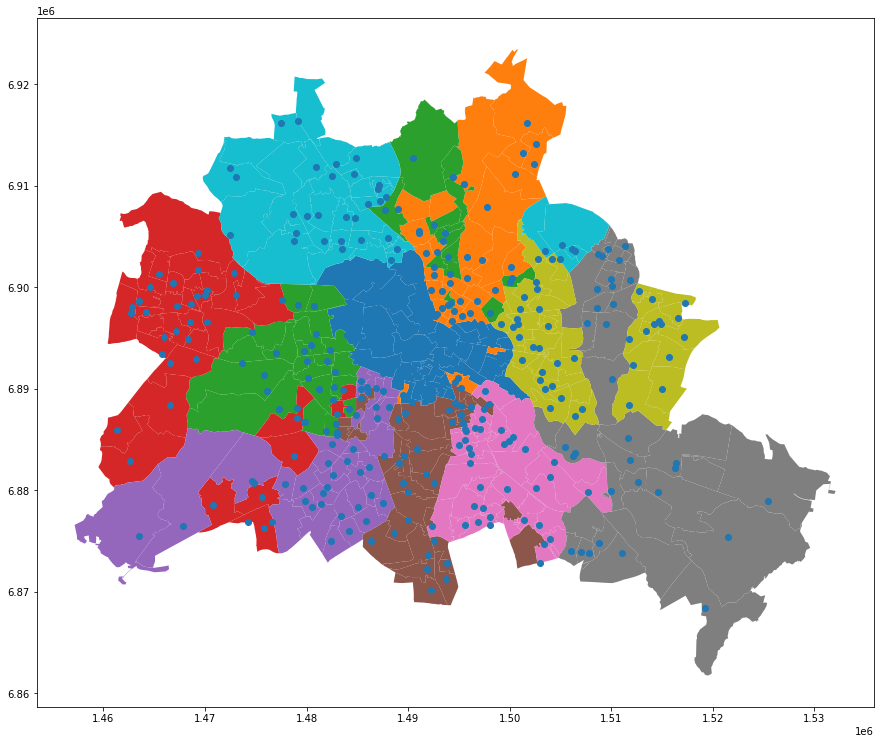

In [503]:
fig, ax = plt.subplots(figsize=(15, 15))
school_districts.plot(column=('ESB'), ax=ax)
schools_points.plot(ax = ax)


In [521]:
ESB2018 = gp.read_file('/Users/Safia/Documents/Mapping_Social_Inequalities/Maps/Berlin_Grundschuleinzugsbereiche20182019_25833.shp')




In [526]:
ESB2018.head()

,OBJECTID_1,OBJECTID,ESB,BEZ,BEZName,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,1,0222,02,Friedrichshain-Kreuzberg,3679.782466,1.326213e+06,6040.587658,"POLYGON ((392790.816 5817320.787, 392818.620 5..."
1,2,2,0805,08,Neuk,2934.508729,1.042076e+06,4816.567620,"POLYGON ((393581.953 5816411.512, 393619.625 5..."
2,3,3,0305,03,Pankow,2889.418940,9.675021e+05,4745.564485,"POLYGON ((393384.391 5821374.239, 393468.559 5..."
3,4,4,1010,10,Marzahn-Hellersdorf,11313.547845,1.024096e+07,18594.748346,"POLYGON ((401232.997 5824569.912, 401396.946 5..."
4,5,5,0514,05,Spandau,9854.088778,1.305560e+07,16195.060329,"POLYGON ((373981.081 5820471.604, 373939.938 5..."


<AxesSubplot:>

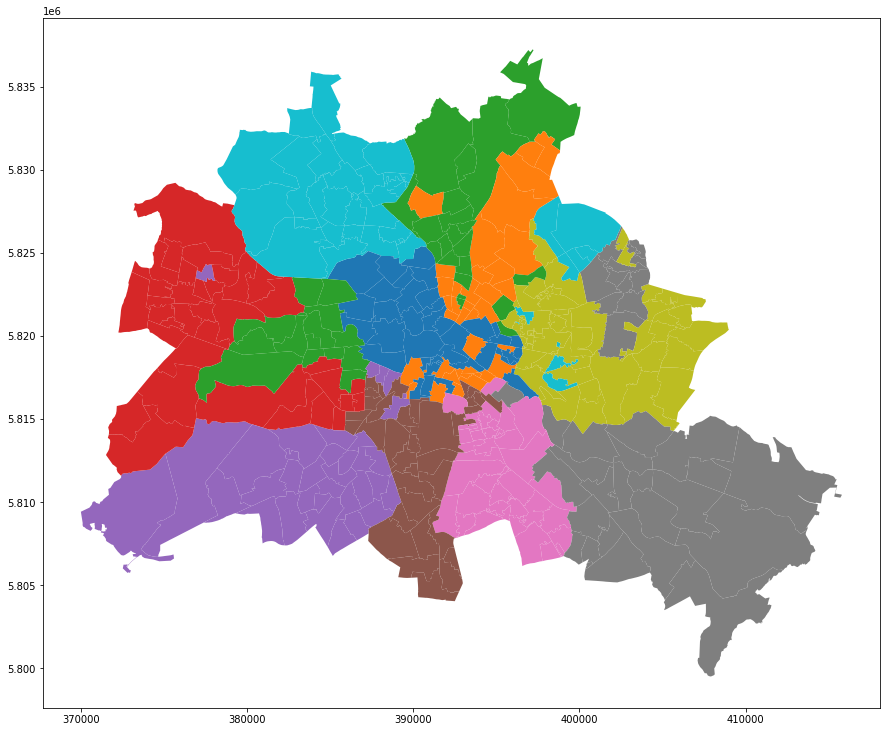

In [525]:
ESB2018.plot(column='ESB', figsize=(15,15))

<AxesSubplot:>

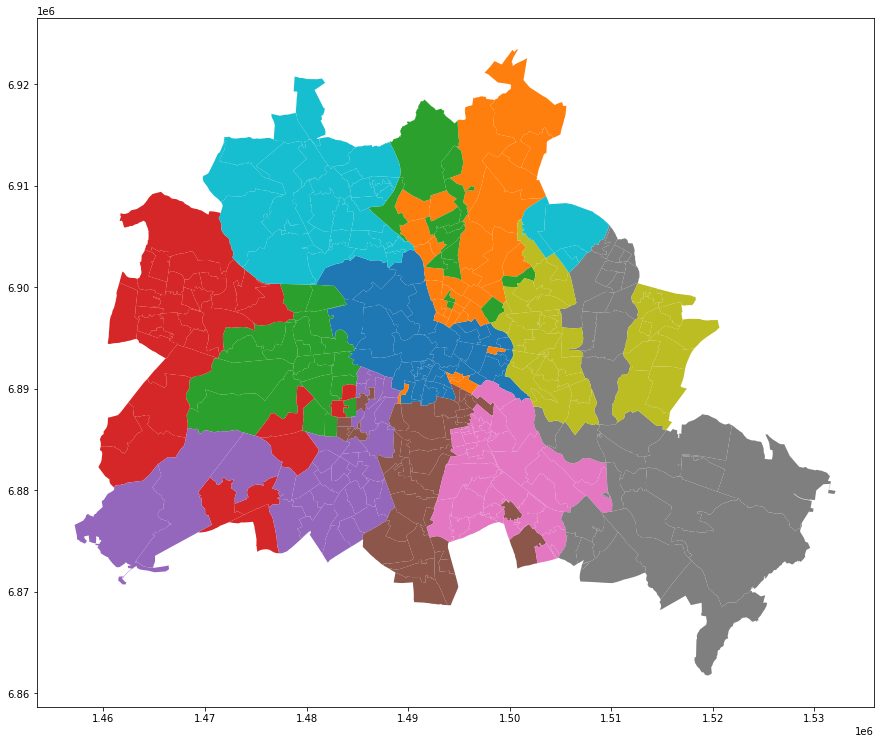

In [528]:
school_districts.plot(column='ESB', figsize=(15,15))

In [512]:
schools_points.to_csv('schools_location')

In [515]:
schools_points.head()

,index_left,ID,ESB,BEZ,FLAECHE_HA,QUELLE,QUELLEURL,EMAIL,LIZENZ,ZEITBEZUG,...,children_f,children_m,teachers,teachers_f,teachers_m,teachers_rate,capacity_rate,Adresses,location,geometry
0,6.0,0107,0107,01,362.2863,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,...,203,224,32,28,4,0.074941,0.002524,Ruppiner Str. 47-48 10115 Berlin,POINT (13.40027 52.53722),POINT (1491711.611 6897851.216)
1,6.0,0107,0107,01,362.2863,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,...,318,274,45,32,13,0.076014,0.0035,Bergstr. 58 10115 Berlin,POINT (13.39108 52.53281),POINT (1490688.489 6897043.117)
2,6.0,0107,0107,01,362.2863,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,...,181,219,29,24,5,0.0725,0.002365,Gipsstr. 23 A 10119 Berlin,POINT (13.40181 52.52667),POINT (1491883.132 6895919.756)
3,5.0,0106,0106,01,180.8529,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,...,188,213,38,29,9,0.094763,0.002371,Hannoversche Str. 20 10115 Berlin,POINT (13.38063 52.52735),POINT (1489524.874 6896044.600)
4,10.0,0111,0111,01,215.8888,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,...,168,193,29,24,5,0.080332,0.002134,Singerstr. 8 10179 Berlin,POINT (13.42412 52.51629),POINT (1494365.735 6894021.880)


In [518]:
schools_info = schools_points[['BSN', 'NAME', 'ESB', 'BEZ', 'FLAECHE_HA','School_year', 'children',
       'children_f', 'children_m', 'teachers', 'teachers_f', 'teachers_m',
       'teachers_rate', 'capacity_rate', 'Adresses','Bezirk', 'location', 'geometry','EW_insgesa', 'EW_U6',
       'EW_6U14', 'EW_14U18', 'EW_18U25', 'EW_25U45', 'EW_45U65', 'EW_65plus',
       ]]

In [519]:
schools_info

,BSN,NAME,ESB,BEZ,FLAECHE_HA,School_year,children,children_f,children_m,teachers,...,location,geometry,EW_insgesa,EW_U6,EW_6U14,EW_14U18,EW_18U25,EW_25U45,EW_45U65,EW_65plus
0,01G01,Grundschule am Arkonaplatz,0107,01,362.2863,2021/22,427,203,224,32,...,POINT (13.40027 52.53722),POINT (1491711.611 6897851.216),54380.0,4228.0,3963.0,1504.0,4090.0,23759.0,11663.0,5173.0
1,01G02,Papageno-Grundschule,0107,01,362.2863,2021/22,592,318,274,45,...,POINT (13.39108 52.53281),POINT (1490688.489 6897043.117),54380.0,4228.0,3963.0,1504.0,4090.0,23759.0,11663.0,5173.0
2,01G04,Kastanienbaum-Grundschule,0107,01,362.2863,2021/22,400,181,219,29,...,POINT (13.40181 52.52667),POINT (1491883.132 6895919.756),54380.0,4228.0,3963.0,1504.0,4090.0,23759.0,11663.0,5173.0
3,01G05,Grundschule Neues Tor,0106,01,180.8529,2021/22,401,188,213,38,...,POINT (13.38063 52.52735),POINT (1489524.874 6896044.600),7176.0,424.0,319.0,91.0,544.0,3465.0,1758.0,575.0
4,01G07,GutsMuths-Grundschule,0111,01,215.8888,2021/22,361,168,193,29,...,POINT (13.42412 52.51629),POINT (1494365.735 6894021.880),16014.0,719.0,668.0,277.0,1229.0,5188.0,3645.0,4288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,12G29,Hermann-Schulz-Grundschule,1229,12,100.3129,2021/22,390,178,212,39,...,POINT (13.32526 52.57353),POINT (1483361.202 6904499.707),8571.0,443.0,503.0,205.0,689.0,2151.0,2468.0,2112.0
375,12G30,Reineke-Fuchs-Grundschule,1230,12,136.2479,2021/22,463,231,232,38,...,POINT (13.31030 52.57378),POINT (1481695.518 6904543.759),8418.0,502.0,718.0,337.0,869.0,2488.0,2107.0,1397.0
376,12G32,Charlie-Chaplin-Grundschule,1232,12,48.2276,2021/22,472,217,255,42,...,POINT (13.36505 52.59753),POINT (1487790.828 6908896.466),6890.0,665.0,832.0,393.0,596.0,1745.0,1488.0,1171.0
377,12G33,Lauterbach-Grundschule,1227,12,46.9596,2021/22,547,261,286,58,...,POINT (13.35945 52.60370),POINT (1487166.848 6910027.628),6784.0,499.0,714.0,337.0,538.0,1657.0,1579.0,1460.0


In [5]:
shape2 = gp.read_file('/Users/Safia/Documents/Mapping_Social_Inequalities/Maps/blockflaechen22.shp')

In [6]:
shape2 = shape2.to_crs(epsg=3857)

In [7]:
shape2.head(3)

,fid,FLALLE,STR_FLGES,BEZ,BEZIRK,STAT,PRG,PRG_NAME,BZR,BZR_NAME,PLR,PLR_NAME,geometry
0,blockflaechen.0,58719.0,620.0,9.0,Treptow-Köpenick,140,0905,Treptow - Köpenick 5,090518,Rahnsdorf/Hessenwinkel,09051801,Rahnsdorf/Hessenwinkel,"POLYGON ((1527244.277 6880296.624, 1527214.141..."
1,blockflaechen.1,276064.0,0.0,9.0,Treptow-Köpenick,140,0905,Treptow - Köpenick 5,090518,Rahnsdorf/Hessenwinkel,09051801,Rahnsdorf/Hessenwinkel,"POLYGON ((1527589.432 6880347.701, 1527797.742..."
2,blockflaechen.2,92532.0,0.0,9.0,Treptow-Köpenick,140,0905,Treptow - Köpenick 5,090518,Rahnsdorf/Hessenwinkel,09051801,Rahnsdorf/Hessenwinkel,"POLYGON ((1527797.742 6881568.803, 1527892.489..."


In [8]:
shape.head(3)

,ID,ESB,BEZ,FLAECHE_HA,QUELLE,QUELLEURL,EMAIL,LIZENZ,ZEITBEZUG,KOORD,EW_insgesa,EW_U6,EW_6U14,EW_14U18,EW_18U25,EW_25U45,EW_45U65,EW_65plus,geometry
0,0101,0101,01,714.2888,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,WGS 1984 Web Mercator (Auxiliary Sphere),52679.0,2729.0,2973.0,1446.0,5742.0,17266.0,13427.0,9096.0,"POLYGON ((1488519.900 6901004.730, 1488275.330..."
1,0102,0102,01,281.5048,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,WGS 1984 Web Mercator (Auxiliary Sphere),45292.0,3351.0,3565.0,1781.0,5914.0,16568.0,9614.0,4499.0,"POLYGON ((1491524.273 6900577.296, 1491518.420..."
2,0103,0103,01,474.6364,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,WGS 1984 Web Mercator (Auxiliary Sphere),50233.0,3320.0,3549.0,1712.0,6379.0,19367.0,11046.0,4860.0,"POLYGON ((1489671.449 6897303.361, 1489330.429..."


In [9]:
shape3 = shape.overlay(shape2)

In [14]:
shape3.head(3)

,ID,ESB,BEZ_1,FLAECHE_HA,QUELLE,QUELLEURL,EMAIL,LIZENZ,ZEITBEZUG,KOORD,...,BEZ_2,BEZIRK,STAT,PRG,PRG_NAME,BZR,BZR_NAME,PLR,PLR_NAME,geometry
0,0101,0101,01,714.2888,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,WGS 1984 Web Mercator (Auxiliary Sphere),...,1.0,Mitte,009,0104,Wedding,010442,Wedding Zentrum,01044203,Leopoldplatz,"POLYGON ((1487724.390 6901393.489, 1487745.286..."
1,0101,0101,01,714.2888,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,WGS 1984 Web Mercator (Auxiliary Sphere),...,1.0,Mitte,009,0104,Wedding,010442,Wedding Zentrum,01044203,Leopoldplatz,"POLYGON ((1487742.945 6901401.676, 1487800.040..."
2,0101,0101,01,714.2888,Amt für Statistik Berlin-Brandenburg,www.statistik-berlin-brandenburg,rbs@statistik-bbb.de,CC-BY 3.0 Namensnennung,2012,WGS 1984 Web Mercator (Auxiliary Sphere),...,1.0,Mitte,009,0104,Wedding,010442,Wedding Zentrum,01044203,Leopoldplatz,"POLYGON ((1488115.333 6901455.841, 1488142.742..."


<AxesSubplot:>

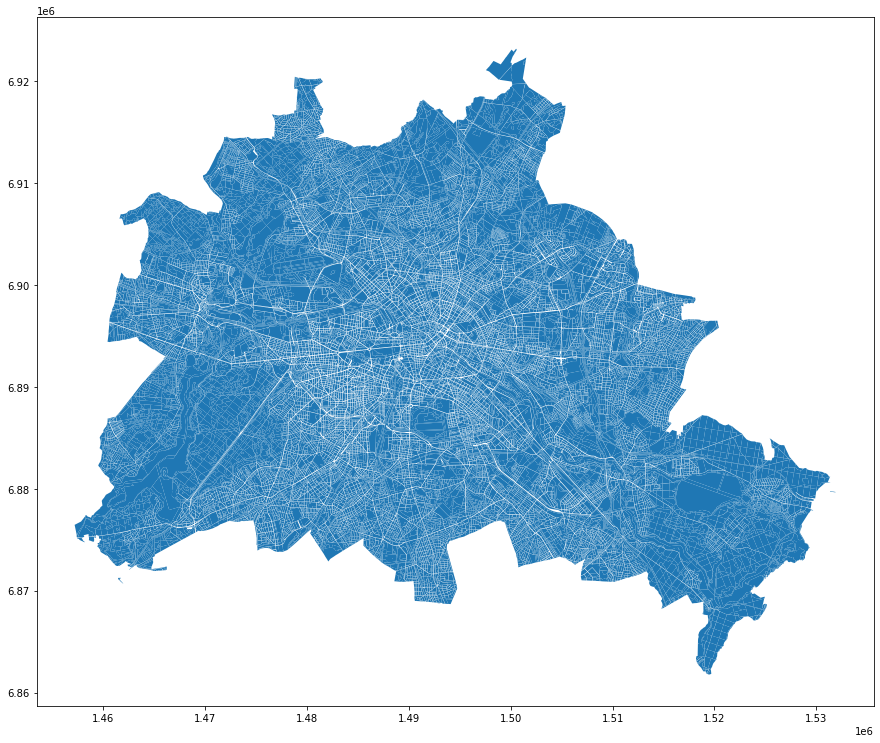

In [13]:
shape3.plot(figsize=[15,15])